In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import model_selection
from sklearn import metrics
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [23]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v4.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head()

,UF,Sexo,Idade,Cor da pele,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,...,Grau da limitação de atividade habitual,Diagnóstico de outras doenças mentais,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de alcoolismo,Diagnóstico de depressão
0,11.0,2.0,32.0,1.0,1.0,1.0,2.0,0.0,3.0,1.0,...,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,11.0,1.0,50.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,11.0,1.0,47.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,...,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,11.0,2.0,20.0,4.0,1.0,1.0,2.0,0.0,4.0,1.0,...,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,11.0,1.0,61.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [24]:
# Função para normalizar usando Min-Max
def minmax_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

# Aplicando a normalização Min-Max ao DataFrame
df = minmax_scaling(df)

In [25]:
df.head()

,UF,Sexo,Idade,Cor da pele,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,...,Grau da limitação de atividade habitual,Diagnóstico de outras doenças mentais,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de alcoolismo,Diagnóstico de depressão
0,0.0,1.0,0.195402,0.000,0.0,0.0,0.5,0.0,0.071429,0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.402299,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.367816,0.000,0.0,0.0,0.5,0.0,0.047619,0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.057471,0.375,0.0,0.0,0.5,0.0,0.095238,0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.528736,0.375,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# # Aplicação da Transformação Robusta
# scaler = RobustScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# # Se quiser visualizar os primeiros registros após a normalização
# df.head()

In [27]:
# # Função para normalização de robustez
# def robust_scaling(series):
#     median = series.median()
#     q3, q1 = series.quantile([0.75, 0.25])
#     iqr = q3 - q1
    
#     if iqr == 0:
#         # Se o IQR for zero, use a normalização z-score
#         return (series - series.mean()) / series.std()
#     else:
#         return (series - median) / iqr


# # Aplicar a função de normalização de robustez a todas as colunas do DataFrame
# df = df.apply(robust_scaling)

In [28]:
df.fillna(0, inplace=True)

In [29]:
df

,UF,Sexo,Idade,Cor da pele,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,...,Grau da limitação de atividade habitual,Diagnóstico de outras doenças mentais,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de alcoolismo,Diagnóstico de depressão
0,0.0,1.0,0.195402,0.000,0.00,0.000000,0.5,0.000000,0.071429,0.2,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.402299,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.367816,0.000,0.00,0.000000,0.5,0.000000,0.047619,0.2,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,1.0,0.057471,0.375,0.00,0.000000,0.5,0.000000,0.095238,0.2,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.528736,0.375,0.00,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,1.0,1.0,0.379310,0.000,0.25,0.000000,0.0,0.000000,0.000000,0.0,...,0.2,1.0,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.0,1.0
16772,1.0,1.0,0.712644,0.000,0.25,0.000000,0.0,0.000000,0.000000,0.0,...,0.2,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
16773,1.0,0.0,0.390805,0.250,0.50,0.333333,1.0,0.000000,0.071429,0.2,...,0.6,1.0,0.071429,0.333333,0.333333,0.333333,0.000000,0.000000,0.0,1.0
16774,1.0,1.0,0.413793,0.000,0.50,0.666667,1.0,0.142857,0.166667,0.2,...,0.4,0.0,0.071429,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.0


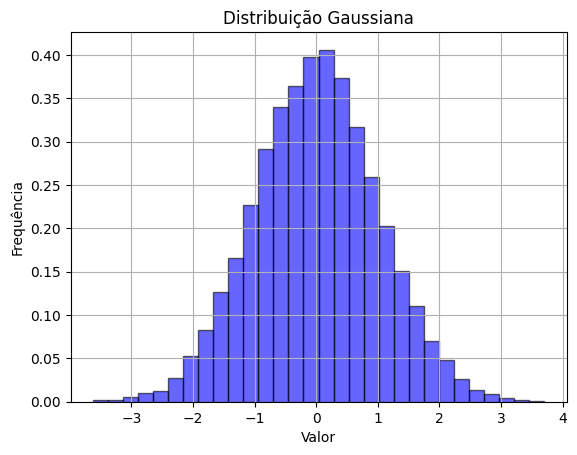

In [30]:
# Parâmetros da distribuição gaussiana
mu = 0  # Média
sigma = 1  # Desvio padrão
tamanho_amostra = len(df)  # Tamanho da amostra

# Gerar dados normalmente distribuídos
dados = np.random.normal(mu, sigma, tamanho_amostra)

# Traçar um histograma para visualizar a distribuição
plt.hist(dados, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Distribuição Gaussiana')
plt.grid(True)
plt.show()

In [31]:
# Todos os outliers da base
def Outlier(df):
   
   sns.boxplot(
      data = df,
      orient =  "h",
      showcaps = False,
      notch = True,
      flierprops = {"marker": "."},
      boxprops = {
         "facecolor": (.4, .6, .8, .5)
      },
      medianprops = {
         "color": "coral"
      }
   )

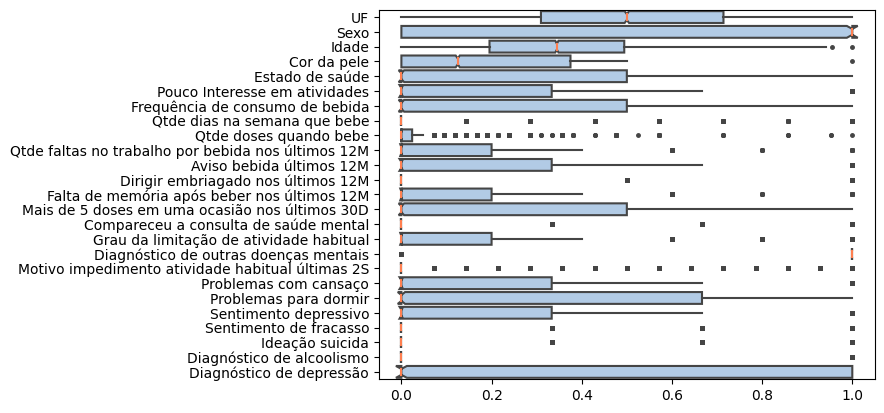

In [32]:
Outlier(df)

In [33]:
#Randomizando os dados do Dataframe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [34]:
# array = df.values
# array
# X = array[:,0:len(df.columns)-1]
# Y = array[:,len(df.columns)-1]

X = df.drop("Diagnóstico de depressão", axis=1)
Y = df["Diagnóstico de depressão"]


print("X:", len(X), "Y:", len(Y))


X: 16776 Y: 16776


In [35]:
test_size = 0.4 # Tamanho do conjunto de teste
seed = 101 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = test_size, random_state=seed)

In [36]:
Y_train.value_counts()

0.0    5058
1.0    5007
Name: Diagnóstico de depressão, dtype: int64

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

# Defina o modelo que você deseja avaliar
modelo = RandomForestClassifier()

# Defina o número de folds
num_folds = 10  # Você pode ajustar esse valor conforme necessário

# Defina a métrica que deseja avaliar (por exemplo, precisão)
metrica = make_scorer(precision_score)

# Crie um objeto de validação cruzada k-fold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Realize a validação cruzada e obtenha as métricas de desempenho
scores = cross_val_score(modelo, X, Y, cv=kf, scoring=metrica)

# Calcule a média das métricas
media_desempenho = scores.mean()
desvio_padrao = scores.std()

print(f'Média da Precisão: {media_desempenho}')
print(f'Desvio Padrão da Precisão: {desvio_padrao}')


Média da Precisão: 1.0
Desvio Padrão da Precisão: 0.0


In [38]:
rf_classifier = RandomForestClassifier()
scaler = StandardScaler()

scaler.fit(X_train)  # Ajuste aos dados de treinamento

X_train_scaled = scaler.transform(X_train)  # Padronize os dados de treinamento
X_test_scaled = scaler.transform(X_test) 

In [39]:
X_train_scaled

array([[-0.68776781, -1.38013112, -1.53127092, ..., -0.49747108,
        -0.28840439, -0.2250029 ],
       [ 1.64844884,  0.72456884, -0.17267718, ..., -0.49747108,
        -0.28840439, -0.2250029 ],
       [ 0.86970996,  0.72456884,  1.30405514, ...,  0.66452623,
        -0.28840439, -0.2250029 ],
       ...,
       [ 0.00444453, -1.38013112,  1.95381737, ..., -0.49747108,
        -0.28840439, -0.2250029 ],
       [ 1.82150192, -1.38013112, -0.23174647, ..., -0.49747108,
        -0.28840439, -0.2250029 ],
       [-0.60124126, -1.38013112, -1.11778587, ..., -0.49747108,
        -0.28840439, -0.2250029 ]])

In [40]:
rf_classifier.fit(X_train_scaled, Y_train)  # Treine o modelo com os dados padronizados

y_pred = rf_classifier.predict(X_test_scaled)  # Faça previsões

In [41]:
report = classification_report(Y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2) 
df_report

,precision,recall,f1-score,support
0.0,1.0,1.0,1.0,3386.0
1.0,1.0,1.0,1.0,3325.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,6711.0
weighted avg,1.0,1.0,1.0,6711.0


C:\Users\r3hab\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


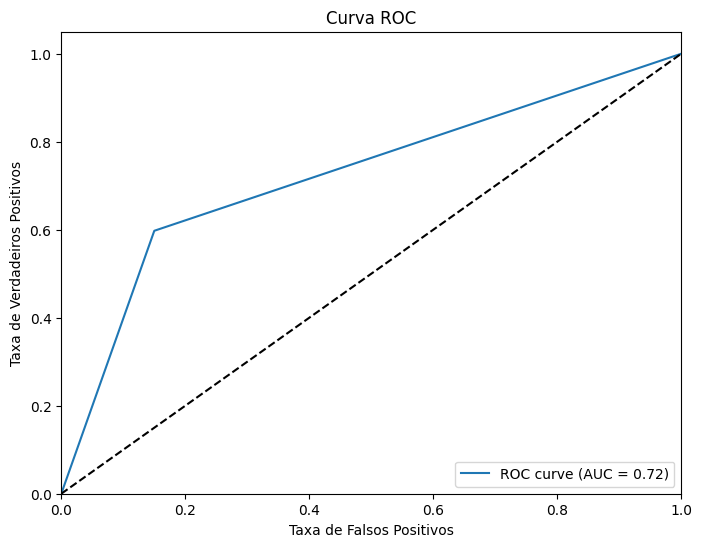

In [43]:
probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(Y_test, probs)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

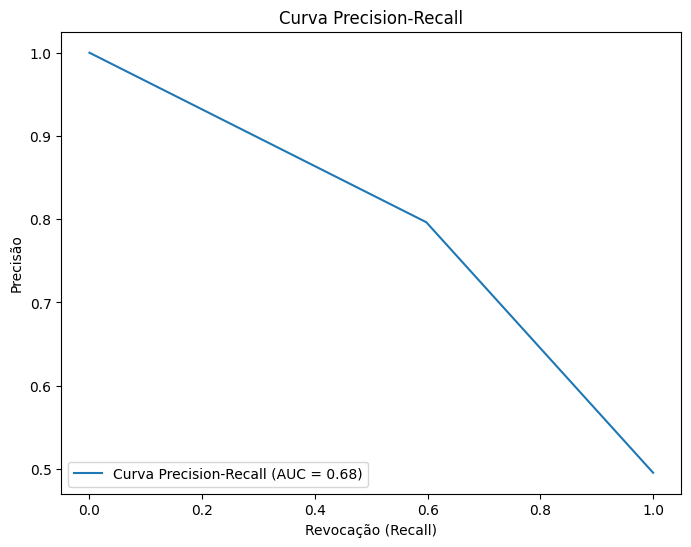

In [44]:
precision, recall, thresholds = precision_recall_curve(Y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Curva Precision-Recall (AUC = {:.2f})'.format(average_precision_score(Y_test, probs)))
plt.xlabel('Revocação (Recall)')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.show()

In [45]:
report = classification_report(Y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2) 
df_report

,precision,recall,f1-score,support
0.0,1.0,1.0,1.0,3386.0
1.0,1.0,1.0,1.0,3325.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,6711.0
weighted avg,1.0,1.0,1.0,6711.0


In [46]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import numpy as np

# Criando o modelo da RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(len(X_train.columns), 1))) 

model.add(Dense(1, activation='sigmoid'))  #Camada de saída para classificação binária


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Formatando os dados em sequência para ajustar as entradas
X_train_rnn = np.expand_dims(X_train.values, axis=2)  # Adicionando uma dimensão para tratar os dados como sequências

a = model.fit(X_train_rnn, Y_train, epochs=10, batch_size=20)  # Ajustando o número de épocas e tamanho do lote

Epoch 1/10
504/504 [==============================] - 2s 3ms/step - loss: 0.2384 - accuracy: 0.9096
Epoch 2/10
504/504 [==============================] - 1s 3ms/step - loss: 0.0971 - accuracy: 0.9694
Epoch 3/10
504/504 [==============================] - 1s 2ms/step - loss: 0.0535 - accuracy: 0.9825
Epoch 4/10
504/504 [==============================] - 1s 2ms/step - loss: 0.0114 - accuracy: 0.9974
Epoch 5/10
504/504 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.9982
Epoch 6/10
504/504 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 7/10
504/504 [==============================] - 1s 3ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 8/10
504/504 [==============================] - 1s 3ms/step - loss: 1.3788e-04 - accuracy: 1.0000
Epoch 9/10
504/504 [==============================] - 1s 3ms/step - loss: 5.2767e-04 - accuracy: 0.9999
Epoch 10/10
504/504 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy

In [47]:
# Avalie o modelo e faça previsões
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

210/210 [==============================] - 0s 1ms/step - loss: 2.0155e-05 - accuracy: 1.0000
Test Loss: 2.0155297534074634e-05
Test Accuracy: 1.0


In [ ]:
# precision, recall, thresholds = precision_recall_curve(Y_test, probs)

# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, label='Curva Precision-Recall (AUC = {:.2f})'.format(average_precision_score(Y_test, probs)))
# plt.xlabel('Revocação (Recall)')
# plt.ylabel('Precisão')
# plt.title('Curva Precision-Recall')
# plt.legend(loc="lower left")
# plt.show()

In [ ]:
# rf = RandomForestRegressor()

# rf.fit(X_train, Y_train)
# predict = rf.predict(X_test)
# explained_variance = metrics.explained_variance_score(Y_test, predict)
# mean_absolute_error = metrics.mean_absolute_error(Y_test, predict) 
# mse = metrics.mean_squared_error(Y_test, predict) 
# mean_squared_log_error = metrics.mean_squared_log_error(Y_test, predict)
# median_absolute_error = metrics.median_absolute_error(Y_test, predict)
# r2 = metrics.r2_score(Y_test, predict)

# # Mostrando o resultado de desempenho do modelo
# print('Ex.V: ', explained_variance)
# print('MSLE: ', mean_squared_log_error)
# print('R2  : ', r2)
# print('MAE : ', mean_absolute_error)
# print('MSE : ', mse)
# print('RMSE: ', np.sqrt(mse))


In [ ]:
# # Suponha que Y_test contenha os valores reais e predict contenha os valores previstos.

# plt.figure(figsize=(8, 6))

# # Plotagem dos valores reais com marcador 'o' (círculos)
# plt.scatter(Y_test, Y_test, alpha=0.5, label='Valores Reais', marker='o')

# # Plotagem dos valores previstos com marcador 'x' (cruz)
# plt.scatter(Y_test, predict, alpha=0.5, label='Valores Previstos', marker='x')

# plt.xlabel('Valores Reais')
# plt.ylabel('Valores Previstos')
# plt.title('Gráfico de Dispersão de Valores Reais vs. Valores Previstos')
# plt.legend()  # Adiciona uma legenda ao gráfico

# plt.show()

In [ ]:
# # Histograma de Resíduos
# residuals = Y_test - predict
# residuals = np.ravel(residuals)
# plt.figure(figsize=(8, 6))
# plt.hist(residuals, bins=30)
# plt.xlabel('Resíduos')
# plt.ylabel('Frequência')
# plt.title('Histograma de Resíduos')
# plt.show()


In [ ]:
# # Gráfico de Probabilidade Normal dos Resíduos
# from scipy import stats
# plt.figure(figsize=(8, 6))
# stats.probplot(residuals, plot=plt)
# plt.title('Gráfico de Probabilidade Normal dos Resíduos')
# plt.show()

In [ ]:
# # Calcular os resíduos
# plt.figure(figsize=(8, 6))
# plt.scatter(predict, residuals, alpha=0.5)
# plt.axhline(y=0, color='r', linestyle='--')  # Linha de referência dos resíduos igual a zero
# plt.xlabel('Valores Previstos')
# plt.ylabel('Resíduos')
# plt.title('Gráfico de Resíduos vs. Valores Previstos')
# plt.show()

In [49]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_classifier, X_train, Y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

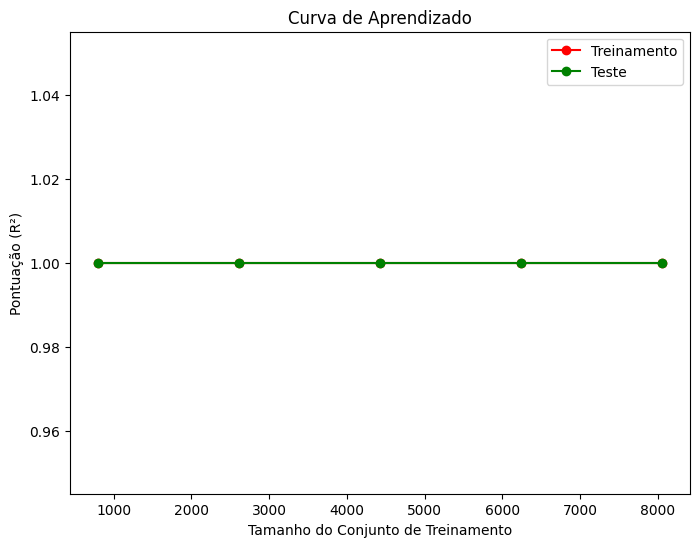

In [51]:
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Teste")
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação (R²)')
plt.legend(loc="best")
plt.title('Curva de Aprendizado')
plt.show()